In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()  #FontProperties폰트지정함수 위치,이름(맑은고딕)
plt.rc("font", family=font_name)  

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import folium
from folium.plugins import MarkerCluster
from tqdm.notebook import tqdm

In [72]:
import time
from tqdm import tqdm_notebook

In [3]:
## 워드 클라우드 생성을 위한 패키지
from wordcloud import WordCloud
## 워드클라우드 모양을 변형시키고자 하는 이미지 활용에 사용 패키지
from PIL import Image

In [4]:
data = pd.read_csv("data/Pre_Charging.csv")
data.head()

C:\Users\pwngu\AppData\Local\Temp\ipykernel_21568\961044018.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/Pre_Charging.csv")


,충전소명,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,실충전시간,미사용시간
0,국민체육센터,USCE20040701,울산광역시 남구 야음동 184-1,급속,50.0,17.72,0.67,40,2022-01-01,2022-01-01 09:51:51,2022-01-01 10:31:51,0.35,0.32
1,국민체육센터,USCE20040701,울산광역시 남구 야음동 184-1,급속,50.0,11.96,0.67,40,2022-01-01,2022-01-01 10:33:43,2022-01-01 11:13:43,0.24,0.43
2,동두천지사,876,경기도 동두천시 평화로 2262,급속,50.0,8.83,0.35,21,2022-01-01,2022-01-01 18:38:26,2022-01-01 18:59:43,0.18,0.17
3,동두천지사,876,경기도 동두천시 평화로 2262,급속,50.0,50.00,1.92,55,2022-01-01,2022-01-01 19:10:29,2022-01-01 21:05:43,1.00,0.92
4,동두천지사,876,경기도 동두천시 평화로 2262,급속,50.0,43.01,0.95,57,2022-01-01,2022-01-01 12:37:45,2022-01-01 13:35:12,0.86,0.09


In [9]:
data['지역'] = data['주소'].str.split(" ").str[0]

In [64]:
data_count = data.groupby("지역").size()

In [ ]:
data_group = data.groupby("지역").size()

In [65]:
data_count = pd.DataFrame(data_count)

In [66]:
data_count.columns = ['count']

In [67]:
dT = data_count.T

In [68]:
dT['제주특별자치도'] = 73433

In [69]:
data_count = dT.T

In [70]:
data_count

,count
지역,
강원도,42571
경기도,186966
경상남도,52588
경상북도,40389
광주광역시,17907
대구광역시,58638
대전광역시,35752
부산광역시,36862
서울특별시,137278


# 제주

In [5]:
# 제주도
jeju = pd.read_csv("data/Jeju.csv")

In [6]:
jeju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73433 entries, 0 to 73432
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   충전소명    73433 non-null  object 
 1   충전기ID   73433 non-null  int64  
 2   주소      73433 non-null  object 
 3   충전기구분   73433 non-null  object 
 4   충전용량    73433 non-null  float64
 5   충전량     73433 non-null  float64
 6   충전시간    73433 non-null  float64
 7   충전분     73433 non-null  int64  
 8   충전종료일자  73433 non-null  object 
 9   충전시작시각  73433 non-null  object 
 10  충전종료시각  73433 non-null  object 
 11  실충전시간   73433 non-null  float64
 12  미사용시간   73433 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 7.3+ MB


In [109]:
jeju.head(3)

,충전소명,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,실충전시간,미사용시간,충전시작time
0,제주하귀휴먼시아2단지,3621,제주특별자치도 제주시 애월읍 하귀9길 71,급속,50.0,54.45,2.45,27,2022-01-01,2022-01-01 20:39:42,2022-01-01 23:07:41,1.09,1.36,20:39:42
1,한경농협 하나로마트,9713,제주특별자치도 제주시 한경면 신한로 76 (신창리),급속,50.0,6.92,0.90,54,2022-01-01,2022-01-01 18:41:34,2022-01-01 19:36:02,0.14,0.76,18:41:34
2,한경농협 하나로마트,9713,제주특별자치도 제주시 한경면 신한로 76 (신창리),급속,50.0,8.35,0.32,19,2022-01-01,2022-01-01 16:57:52,2022-01-01 17:17:24,0.17,0.15,16:57:52


In [7]:
pd.to_datetime(jeju['충전시작시각'])

0       2022-01-01 20:39:42
1       2022-01-01 18:41:34
2       2022-01-01 16:57:52
3       2022-01-01 19:57:55
4       2022-01-01 17:35:33
                ...        
73428   2022-03-30 15:51:36
73429   2022-03-30 16:05:04
73430   2022-03-30 18:58:18
73431   2022-03-30 12:43:07
73432   2022-03-30 16:04:36
Name: 충전시작시각, Length: 73433, dtype: datetime64[ns]

- 시분초만 가져오기

In [8]:
jeju['충전시작time'] = jeju['충전시작시각'].str.split(" ").str[1]

In [9]:
time_list = jeju['충전시작time'].str.split(":")
time_list.head()

0    [20, 39, 42]
1    [18, 41, 34]
2    [16, 57, 52]
3    [19, 57, 55]
4    [17, 35, 33]
Name: 충전시작time, dtype: object

- 시분만

In [10]:
jeju['충전시작time1'] = jeju['충전시작time'].str.split(":").str[0] + ":" + jeju['충전시작time'].str.split(":").str[1]

In [11]:
jeju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73433 entries, 0 to 73432
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   충전소명       73433 non-null  object 
 1   충전기ID      73433 non-null  int64  
 2   주소         73433 non-null  object 
 3   충전기구분      73433 non-null  object 
 4   충전용량       73433 non-null  float64
 5   충전량        73433 non-null  float64
 6   충전시간       73433 non-null  float64
 7   충전분        73433 non-null  int64  
 8   충전종료일자     73433 non-null  object 
 9   충전시작시각     73433 non-null  object 
 10  충전종료시각     73433 non-null  object 
 11  실충전시간      73433 non-null  float64
 12  미사용시간      73433 non-null  float64
 13  충전시작time   73433 non-null  object 
 14  충전시작time1  73433 non-null  object 
dtypes: float64(5), int64(2), object(8)
memory usage: 8.4+ MB


- 시만

In [12]:
jeju['충전시작hour'] = jeju['충전시작time'].str.split(":").str[0]

In [13]:
jeju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73433 entries, 0 to 73432
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   충전소명       73433 non-null  object 
 1   충전기ID      73433 non-null  int64  
 2   주소         73433 non-null  object 
 3   충전기구분      73433 non-null  object 
 4   충전용량       73433 non-null  float64
 5   충전량        73433 non-null  float64
 6   충전시간       73433 non-null  float64
 7   충전분        73433 non-null  int64  
 8   충전종료일자     73433 non-null  object 
 9   충전시작시각     73433 non-null  object 
 10  충전종료시각     73433 non-null  object 
 11  실충전시간      73433 non-null  float64
 12  미사용시간      73433 non-null  float64
 13  충전시작time   73433 non-null  object 
 14  충전시작time1  73433 non-null  object 
 15  충전시작hour   73433 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 9.0+ MB


<AxesSubplot:xlabel='충전시작time1', ylabel='충전량'>

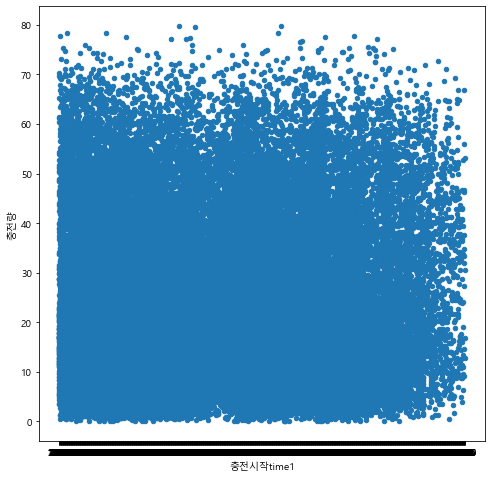

In [273]:
jeju.plot.scatter("충전시작time1", "충전량")

In [94]:
#datetime.datetime.strptime(jeju['충전시작time'], '%H:%M%:%S')

TypeError: strptime() argument 1 must be str, not Series

## 워드클라우드

In [73]:
content_all = ''
for i in tqdm_notebook(range(len(jeju["충전소명"]))):
    content_all = content_all + ' ' + jeju["충전소명"].loc[i]

C:\Users\pwngu\AppData\Local\Temp\ipykernel_4672\1953477551.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(jeju["충전소명"]))):


  0%|          | 0/73433 [00:00<?, ?it/s]

In [74]:
import re
content_all = re.sub('[^ㄱ-ㅣ가-힣 ]',"",content_all)
content_all

' 제주하귀휴먼시아단지 한경농협 하나로마트 한경농협 하나로마트 제주이도한일베라체 아파트 제주서귀포동홍단지 아파트 제주 삼양 유적지 제주도교육청 루온토빌리지 현대노형부영차 아파트 제주공항 제주도련 아파트 애월센터 제주도교육청 아이고운 힐 지구 일도차신천지 제주하귀휴먼시아단지 강창학경기장 서귀포대정 아파트 삼양동 공영주차장 서귀포해양경찰서 제주공항 종합경기장 봉개갤럭시타운 차 다담빌리지 도두동 주민센터 용머리해안 한라산국립공원 관음사탐방안내소 아라아이파크 새마을금고제주연수원 신성로 공영주차장 개인택시조합 서귀포시교육지원청 도남차편한세상 서귀포지사 제주공항 제주삼화단지 아파트 화북 아파트 제주으뜸마을 아파트 노형아이파크 연동한일시티 방선문차빌리지 연동대림차아파트 해오름 아파트 신성로 공영주차장 번개과학체험관 노형 제공영주차장 새마을금고제주연수원 제주삼화단지 아파트 제주국제평화센터 정원파인즈 차 한수풀도서관 삼부비치 아파트 종합경기장 영실매표소 김창열미술관 문화아파트 종합경기장 안덕계곡 주차장 신성로 공영주차장 서부경찰서 제주한림 아파트 제주정든마을단지 아파트 제주공항 서귀포지사 용머리해안 노형 제공영주차장 제주아라스위첸 아파트 현대차 아파트 제주 동부보건소 행복날개 주유소 종합경기장 서귀포동홍 아파트 한라산국립공원 어리목탐방안내소 서귀포시교육지원청 제주공항 미듬아뜨리에 아파트 아라원신 아파트 천지공영주차장 다담빌리지 제주공항 제주서귀포동홍단지 아파트 제주이도한일베라체 아파트 종합경기장 조천도화썬빌리지 종합경기장 아라아이파크 조천도화썬빌리지 예래동주민센터 제주공항 아라원신 아파트 용두암차현대아파트 베라체 공영주차장 신성로 공영주차장 노형차부영 아파트 아라아이파크 화북주공 아파트 노형해든빌 아이린아파트 개인택시조합 미듬하나로 아파트 영산홍주택 동홍인터불고코아루 아파트 아라주원라비앙 삼양동 공영주차장 현대노형부영차 아파트 제일빌리지 제주권역재활센터 제주의료원 제주공항 제주권역재활센터 삼부비치 아파트 서귀포혁신단지 하얀빌라 화북동 공영주차장 아라원신 아파트 제주화북 아파트

In [75]:
from konlpy.tag import Okt
okt = Okt()
nouns_txt = okt.nouns(content_all)
nouns_txt

['제주',
 '휴먼시아',
 '단지',
 '농협',
 '하나로마트',
 '농협',
 '하나로마트',
 '제주',
 '일베',
 '체',
 '아파트',
 '서귀포',
 '홍',
 '단지',
 '아파트',
 '제주',
 '삼양',
 '유적지',
 '제주도',
 '교육청',
 '루',
 '토',
 '노',
 '형부',
 '영차',
 '아파트',
 '제주',
 '공항',
 '제주',
 '도련',
 '아파트',
 '애월',
 '센터',
 '제주도',
 '교육청',
 '아이',
 '힐',
 '지구',
 '일도',
 '차',
 '신천지',
 '제주',
 '휴먼시아',
 '단지',
 '강창학',
 '경기장',
 '서귀포',
 '대정',
 '아파트',
 '삼양동',
 '공영',
 '주차장',
 '서귀포',
 '해양경찰',
 '제주',
 '공항',
 '종합',
 '경기장',
 '봉',
 '갤럭시',
 '타운',
 '차',
 '다담',
 '도두동',
 '주민',
 '센터',
 '용머리',
 '한라산',
 '국립공원',
 '관음사',
 '탐방',
 '안내소',
 '아이파크',
 '새마을금고',
 '수원',
 '신',
 '공영',
 '주차장',
 '개인',
 '택시',
 '조합',
 '서귀포시',
 '교육지원청',
 '도남',
 '차편',
 '한세상',
 '서귀포',
 '지사',
 '제주',
 '공항',
 '화단',
 '아파트',
 '화북',
 '아파트',
 '제주',
 '으뜸',
 '마을',
 '아파트',
 '노',
 '아이파크',
 '시티',
 '방',
 '선문',
 '차',
 '대림',
 '차',
 '아파트',
 '해',
 '오름',
 '아파트',
 '신',
 '공영',
 '주차장',
 '번개',
 '과학',
 '체험',
 '관',
 '노',
 '주차장',
 '새마을금고',
 '수원',
 '화단',
 '아파트',
 '제주',
 '국제',
 '평화',
 '센터',
 '정원',
 '파',
 '인즈',
 '차',
 '수풀',
 '도서관',
 '삼부',
 '비치',
 '아파트',
 

In [76]:
from collections import Counter
count = Counter(nouns_txt)
count
rank_text = count.most_common()
rank_text

[('아파트', 17614),
 ('제주', 12991),
 ('경기장', 5877),
 ('주차장', 5585),
 ('종합', 5445),
 ('서귀포', 4654),
 ('센터', 4104),
 ('차', 3927),
 ('노', 3543),
 ('공영', 2728),
 ('공항', 2619),
 ('단지', 2181),
 ('지사', 2058),
 ('화북', 2008),
 ('마을', 1882),
 ('체', 1745),
 ('사무소', 1729),
 ('개인', 1620),
 ('택시', 1620),
 ('조합', 1620),
 ('방', 1590),
 ('교육', 1535),
 ('대정읍', 1482),
 ('신', 1451),
 ('공연장', 1331),
 ('화단', 1311),
 ('혁신단', 1251),
 ('용머리', 1235),
 ('관', 1227),
 ('동부', 1183),
 ('대림', 1166),
 ('삼양', 1163),
 ('유적지', 1163),
 ('대유', 1152),
 ('아이파크', 1143),
 ('홍', 1131),
 ('주정', 1127),
 ('주민', 1077),
 ('체육관', 1057),
 ('일베', 1038),
 ('주택', 1021),
 ('영차', 961),
 ('서부', 957),
 ('안덕', 936),
 ('선문', 929),
 ('부영', 917),
 ('리움', 914),
 ('본부', 900),
 ('아트', 874),
 ('제주도', 860),
 ('교육청', 860),
 ('회관', 833),
 ('직할', 828),
 ('강창학', 815),
 ('영어', 808),
 ('도시', 808),
 ('한림', 772),
 ('스마트그리드', 770),
 ('홍보', 770),
 ('국제', 736),
 ('베', 707),
 ('공', 703),
 ('보건소', 693),
 ('교회', 685),
 ('새마을금고', 672),
 ('수원', 672),
 ('유수', 672),
 ('암

In [77]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

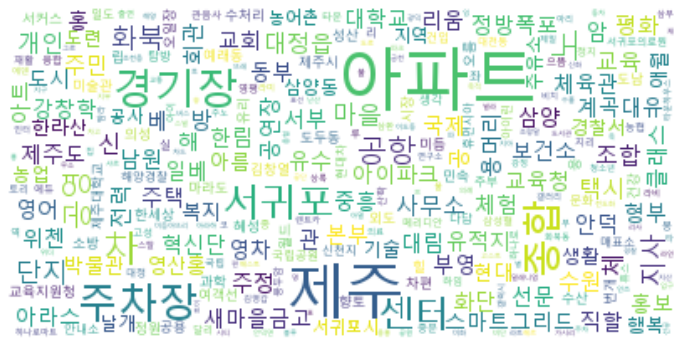

In [78]:
wc = WordCloud(max_font_size=40, background_color="white", max_words=1000,
               font_path="C:\\Windows\\Fonts\\malgun.ttf").generate_from_frequencies(dict(rank_text))

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [17]:
73433 - 55819

17614

### 제주 지역 용도별 분석

In [ ]:
## 용도별 : 주거, 관광, 공공
# 주거용 : 아파트/ 관광용 : 공항, 폭포, 용머리, 유적지, 계곡, 박물관, 미술관, 시장, 오름, 국립공원, 매표소 / 공공용 : 시청, 구청, 면사무소

In [14]:
jeju1 = jeju[jeju['충전소명'].str.contains("아파트", na=False, case=False)]
#jeju2 = jeju[jeju['충전소명'].str.contains("공항|폭포|용머리|유적지|계곡|박물관|미술관|시장|오름|국립공원|매표소", na=False, case=False)]
#jeju3 = jeju[jeju['충전소명'].str.contains("시청|구청|면사무소|새마을금고", na=False, case=False)]

- 아파트 포함된 데이터 제외하고 관광지 관련 단어 포함된 데이터 추출

In [18]:
jeju1_n = jeju[~jeju['충전소명'].str.contains("아파트", na=False, case=False)]

In [19]:
jeju2 = jeju1_n[jeju1_n['충전소명'].str.contains("공항|폭포|용머리|유적지|계곡|박물관|미술관|시장|오름|국립공원|매표소", na=False, case=False)]

In [21]:
print(len(jeju1), len(jeju2))

17614 8404


In [22]:
resid = jeju1.sample(n=8000, random_state=100)
tour = jeju2.sample(n=8000, random_state=100)
#public = jeju3.sample(n=300, random_state=100)

print(len(resid), len(tour))

8000 8000


In [189]:
resid

,충전소명,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,실충전시간,미사용시간,충전시작time,충전시작time1,충전기구분1,충전시작hour
66541,미듬하나로 아파트,5224,제주특별자치도 제주시 도련일동 삼봉로 115-1,완속,7.0,11.93,1.97,58,2022-03-21,2022-03-21 19:36:36,2022-03-21 21:35:01,1.70,0.27,19:36:36,19:36,2,19
6636,제주외도아름마을LH 아파트,3608,제주특별자치도 제주시 외도일동 우정로18길 25,완속,7.0,17.63,2.60,36,2022-01-08,2022-01-08 09:27:03,2022-01-08 12:03:15,2.52,0.08,09:27:03,09:27,2,09
28776,문화아파트,6136,제주특별자치도 제주시 화북이동 일주동로 80,완속,7.0,14.00,2.57,34,2022-02-02,2022-02-02 19:19:55,2022-02-02 21:54:42,2.00,0.57,19:19:55,19:19,2,19
13306,아라원신 아파트,3551,제주특별자치도 제주시 아라일동 중앙로 578,급속,50.0,24.16,0.75,45,2022-01-15,2022-01-14 23:34:57,2022-01-15 00:20:13,0.48,0.27,23:34:57,23:34,1,23
42637,아라원신 아파트,3551,제주특별자치도 제주시 아라일동 중앙로 578,급속,50.0,7.64,0.20,12,2022-02-18,2022-02-18 12:10:00,2022-02-18 12:22:38,0.15,0.05,12:10:00,12:10,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51560,화북4 아파트,5843,제주특별자치도 제주시 화북일동 동화로1길 10,급속,50.0,55.07,1.20,12,2022-03-01,2022-02-28 23:06:07,2022-03-01 00:18:25,1.10,0.10,23:06:07,23:06,1,23
19737,제주도련LH 아파트,3585,제주특별자치도 제주시 도련1동 1618,급속,50.0,14.55,0.38,23,2022-01-22,2022-01-22 11:19:40,2022-01-22 11:43:32,0.29,0.09,11:19:40,11:19,1,11
69432,제주아라스위첸 아파트,3604,제주특별자치도 제주시 아라일동 아란9길 22,완속,7.0,16.00,2.40,24,2022-03-24,2022-03-24 08:36:21,2022-03-24 11:00:47,2.29,0.11,08:36:21,08:36,2,08
62032,제주서귀포동홍6단지LH 아파트,3659,제주특별자치도 서귀포시 동홍동 중앙로 198-9,급속,50.0,11.82,0.48,29,2022-03-15,2022-03-15 15:27:39,2022-03-15 15:56:45,0.24,0.24,15:27:39,15:27,1,15


In [23]:
from matplotlib import dates

In [243]:
#residg = resid.groupby(resid['충전시작time1']).sum()[['충전량']]

In [244]:
#residg['충전시각time1']=residg.index

In [250]:
#residg

,충전량,충전시각time1
충전시작time1,,
00:00,66.79,00:00
00:01,43.98,00:01
00:02,21.60,00:02
00:09,23.14,00:09
00:10,23.72,00:10
...,...,...
23:00,40.62,23:00
23:06,79.76,23:06
23:07,26.26,23:07


In [225]:
resid.groupby(resid['충전시작time1']).sum()[['충전량']]
#tour.groupby(tour['충전시작hour']).sum()[['충전량']]
#public.groupby(public['충전시작hour']).sum()[['충전량']]

,충전량
충전시작time1,
00:00,66.79
00:01,43.98
00:02,21.60
00:09,23.14
00:10,23.72
...,...
23:00,40.62
23:06,79.76
23:07,26.26


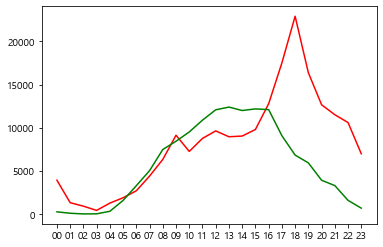

In [24]:
plt.plot(resid.groupby(resid['충전시작hour']).sum()[['충전량']], 'r')
plt.plot(tour.groupby(tour['충전시작hour']).sum()[['충전량']], 'g')
#plt.plot(public.groupby(public['충전시작hour']).sum()[['충전량']], 'b')


In [ ]:
resid.groupby(resid['충전시작hour']).sum()[['충전량']].plot()

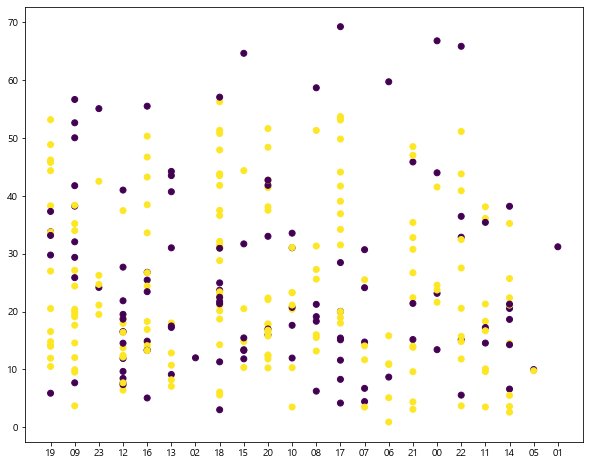

In [195]:
plt.figure(figsize=(10,8))

plt.scatter(resid['충전시작hour'],resid['충전량'], c=resid['충전기구분1'])


#### 상관계수 분석
    - 컬럼 추가해서 진행해보기

In [174]:
jeju.corr(method='pearson')

,충전기ID,충전용량,충전량,충전시간,충전분,실충전시간,미사용시간
충전기ID,1.000000,0.010605,0.036240,0.042405,-0.000409,0.004123,0.073809
충전용량,0.010605,1.000000,-0.044533,-0.636118,-0.038659,-0.726501,-0.164500
충전량,0.036240,-0.044533,1.000000,0.458907,0.126285,0.522167,0.121430
충전시간,0.042405,-0.636118,0.458907,1.000000,0.058690,0.852060,0.669948
충전분,-0.000409,-0.038659,0.126285,0.058690,1.000000,0.050637,0.038426
실충전시간,0.004123,-0.726501,0.522167,0.852060,0.050637,1.000000,0.182227
미사용시간,0.073809,-0.164500,0.121430,0.669948,0.038426,0.182227,1.000000


<AxesSubplot:>

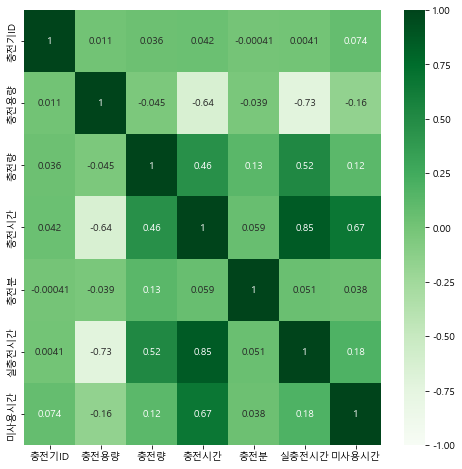

In [287]:
import seaborn as sb
plt.rcParams["figure.figsize"] = (8,8)
sb.heatmap(jeju.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [172]:
jeju.loc[jeju['충전기구분']=='급속', '충전기구분1'] = 1

In [173]:
jeju.loc[jeju['충전기구분']=='완속', '충전기구분1'] = 2

In [275]:
jeju['충전기구분1']

0        1
1        1
2        1
3        2
4        2
        ..
73428    1
73429    1
73430    1
73431    2
73432    1
Name: 충전기구분1, Length: 73433, dtype: object